In [1]:
import yaml
import os

from module.dataset import Dataset
from module.evaluator import Evaluator

In [3]:
with open("./config/config.yaml", 'r') as yml:
    config = yaml.safe_load(yml)  

paths = []
for stock_code in config['data']['stock']['topix30']:
    paths.append(os.path.join('./data/quants/stock_price', f'{stock_code}0.csv'))

stock_num = len(paths)
print(f'{stock_num} files ware loaded.')

dataset = Dataset(paths, window=30, late=1, train_rate=0.8)
X_train, _, X_test, Y_test = dataset.generate()

30 files ware loaded.


In [11]:
forecaster_per_group = 100
num_group = 100

forecaster_paths = [
    f"/home/urachan/ABCD-Forecast/data/forecasters/forecaster_{str(i * forecaster_per_group).zfill(5)}_{str((i + 1)* forecaster_per_group).zfill(5)}.pkl"
    for i in range(forecaster_per_group)
    ]

print(forecaster_paths)

evaluator = Evaluator(forecaster_paths, X_test, Y_test)

['/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00000_00100.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00100_00200.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00200_00300.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00300_00400.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00400_00500.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00500_00600.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00600_00700.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00700_00800.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00800_00900.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_00900_01000.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_01000_01100.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_01100_01200.pkl', '/home/urachan/ABCD-Forecast/data/forecasters/forecaster_01200_01300.pkl', '/home/urachan/ABCD-Fore

In [12]:
result = evaluator.run_evaluation()

100%|██████████| 10000/10000 [11:33<00:00, 14.42it/s] 


In [13]:
estimations, estimations_before_aggregation, true = result

In [14]:
estimations.shape

(458, 30)

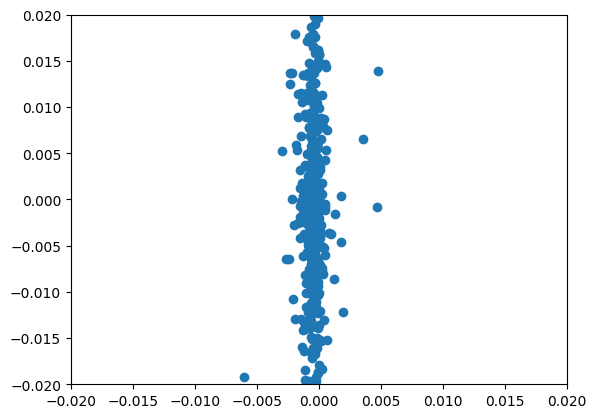

In [19]:
import matplotlib.pyplot as plt

plt.scatter(estimations[:, 1], true[:, 1])
plt.xlim(-0.02, 0.02)
plt.ylim(-0.02, 0.02)

plt.show()

In [10]:
import pickle
with open('estimated.pkl', 'wb') as f:
    pickle.dump(estimated, f)
    
with open('true.pkl', 'wb') as f:
    pickle.dump(true, f)

In [4]:
import matplotlib.pyplot as plt
import pickle

with open('estimated.pkl', 'rb') as f:
    estimated = pickle.load(f)
    
with open('true.pkl', 'rb') as f:
    true = pickle.load(f)
    
plt.scatter(estimated[0], true[0])

EOFError: Ran out of input